<a href="https://colab.research.google.com/github/maiemahmoud/Noise-reduction/blob/main/AutoEncoder_for_noise_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from tensorflow.keras.utils import img_to_array

In [ ]:
# -*- coding: utf-8 -*-
"""skin_cancer_classification.ipynb
 
Automatically generated by Colaboratory.
 
Original file is located at
    https://colab.research.google.com/drive/1LTnnuuFhYOLPaIscr-ktWCepLocIVee1
"""
 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

# x is noisy data and y is clean data
SIZE = 320

In [ ]:
from tqdm import tqdm
noisy_data_old=[]
path1 = 'gdrive/My Drive/noise_ofdm/noisy_images/'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,0)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    noisy_data_old.append(img_to_array(img))

100%|██████████| 50/50 [00:19<00:00,  2.56it/s]


In [ ]:

clean_data=[]
path2 = 'gdrive/My Drive/noise_ofdm/clean_images/'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,0)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    clean_data.append(img_to_array(img))

100%|██████████| 50/50 [00:13<00:00,  3.72it/s]


In [ ]:
noisy_data_old = np.reshape(noisy_data_old, (len(noisy_data_old), SIZE, SIZE, 1))
noisy_data_old = noisy_data_old.astype('float32') / 255.

clean_train = np.reshape(clean_data, (len(clean_data), SIZE, SIZE, 1))
clean_train = clean_train.astype('float32') / 255.

In [ ]:
#adding some noise
noise_factor = 0.5
noisy_train = noisy_data_old + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=noisy_data_old.shape) 
#x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

noisy_train = np.clip(noisy_train, 0., 1.)
#x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
#x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
#x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



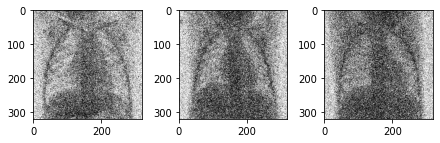

In [ ]:
#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

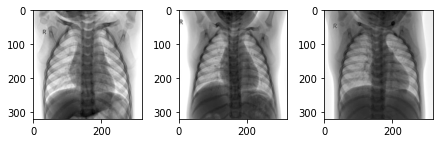

In [ ]:
#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 320, 320, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 160, 160, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 160, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 80, 80, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 40, 40, 8)        0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 0)


model.fit(x_train, y_train, epochs=10, batch_size=8, shuffle=True, verbose = 1,
          validation_split = 0.1)

Epoch 1/10
5/5 [==============================] - 13s 2s/step - loss: 0.2744 - accuracy: 0.0763 - val_loss: 0.2549 - val_accuracy: 0.0408
Epoch 2/10
5/5 [==============================] - 19s 4s/step - loss: 0.2072 - accuracy: 0.0763 - val_loss: 0.1183 - val_accuracy: 0.0408
Epoch 3/10
5/5 [==============================] - 10s 2s/step - loss: 0.0693 - accuracy: 0.0739 - val_loss: 0.0632 - val_accuracy: 0.0223
Epoch 4/10
5/5 [==============================] - 12s 2s/step - loss: 0.0532 - accuracy: 0.0591 - val_loss: 0.0515 - val_accuracy: 0.0402
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 0.0455 - accuracy: 0.0753 - val_loss: 0.0379 - val_accuracy: 0.0395
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 0.0394 - accuracy: 0.0738 - val_loss: 0.0335 - val_accuracy: 0.0401
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 0.0345 - accuracy: 0.0760 - val_loss: 0.0325 - val_accuracy: 0.0406
Epoch 8/10
5/5 [==================

1/1 [==============================] - 1s 563ms/step - loss: 0.0116 - accuracy: 0.0901
Test_Accuracy: 9.01%


1/1 [==============================] - 1s 1s/step


'\nplt.figure(figsize=(40, 4))\nfor i in range(10):\n    # display original\n    ax = plt.subplot(3, 20, i + 1)\n    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")\n    \n    # display reconstructed (after noise removed) image\n    ax = plt.subplot(3, 20, 40 +i+ 1)\n    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")\n\nplt.show()\n\n'

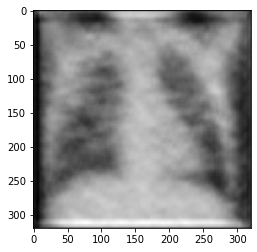

In [ ]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))


model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test)


plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
#plt.imsave('sandstone/denoised_images/denoised_image.tif', no_noise_img[3].reshape(SIZE,SIZE))

"""
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")

plt.show()

"""



